# Business Goal As instructed in Upgrad.com assignment section:
I am required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Dataset Used
The dataset used in this project is a bike-sharing dataset from BoomBikes, a US bike-sharing provider. It contains daily records of bike rentals, along with various features that potentially influence the demand for bike rentals.  Some of fields included in the dataset are:

- **instant**: Record index
- **weathersit**: Weather situation (1: Clear, 2: Mist, 3: Light snow/rain, 4: Heavy rain/snow)
- **temp**: Temperature in Celsius
- **atemp**: Feels-like temperature in Celsius
- **hum**: Humidity
- **windspeed**: Wind speed
- **casual**: Count of casual users
- **registered**: Count of registered users
- **cnt**: Count of total rental bikes, including both casual and registered users

## The libraries used and their respective versions:

- **pandas - version 1.0**: Used for data manipulation and analysis. It provides data structures and functions needed to manipulate structured data seamlessly.
- **numpy - version 1.18**: Utilized for numerical computations. It supports large multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- **statsmodels - version 0.11**: Employed for building and evaluating the regression models. It provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration.
- **sklearn (scikit-learn) - version 0.22**: Used for feature selection and evaluation. It includes simple and efficient tools for data mining and data analysis, built on NumPy, SciPy, and matplotlib.
- **matplotlib - version 3.1**: Used for creating static, interactive, and animated visualizations in Python. It provides an object-oriented API for embedding plots into applications.
- **seaborn - version 0.10**: A statistical data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

By specifying these versions, users can recreate the environment and obtain consistent results. It is recommended to install these specific versions using a package manager like pip to avoid discrepancies due to version differences.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/AkashdeepMH/BikeSharingAssignment/main/day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.cnt

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

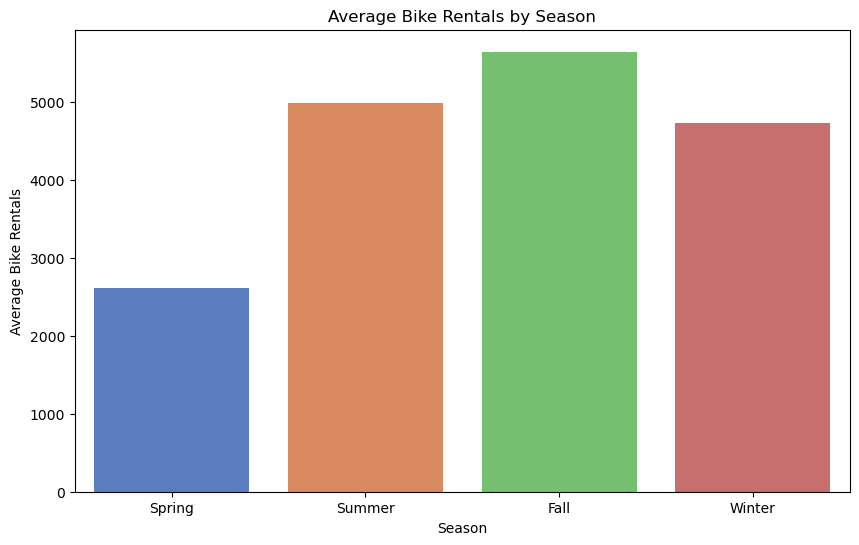

In [8]:
# Seasonal Effect
plt.figure(figsize=(10, 6))
seasonal_data = df.groupby('season')['cnt'].mean().reset_index()
seasonal_data['season'] = seasonal_data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
sns.barplot(x='season', y='cnt', data=seasonal_data, palette='muted')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Season')
plt.show()


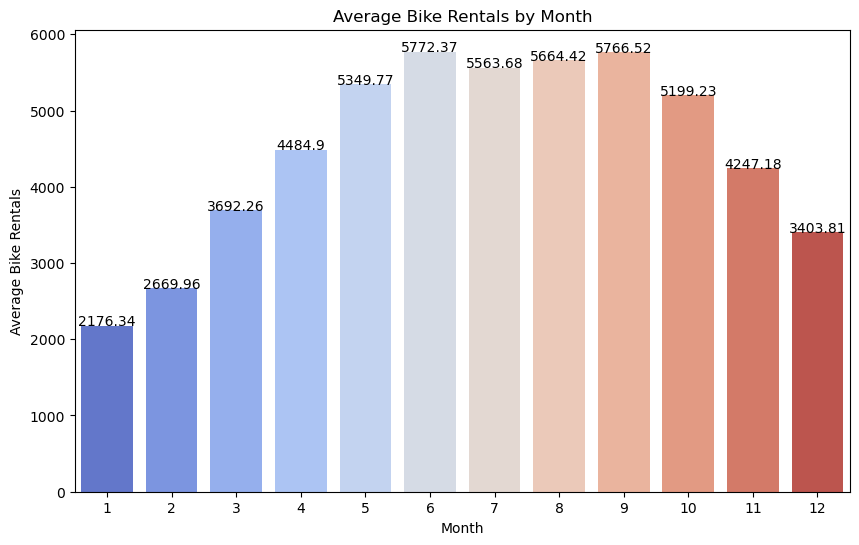

In [9]:
# Monthly Effect
plt.figure(figsize=(10, 6))
monthly_data = df.groupby('mnth')['cnt'].mean().reset_index()
barplot = sns.barplot(x='mnth', y='cnt', data=monthly_data, palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Month')
#Annotate each bar with the average value
for index, row in monthly_data.iterrows():
    plt.text(row.name, row.cnt, round(row.cnt, 2), color='black', ha="center")
plt.show()


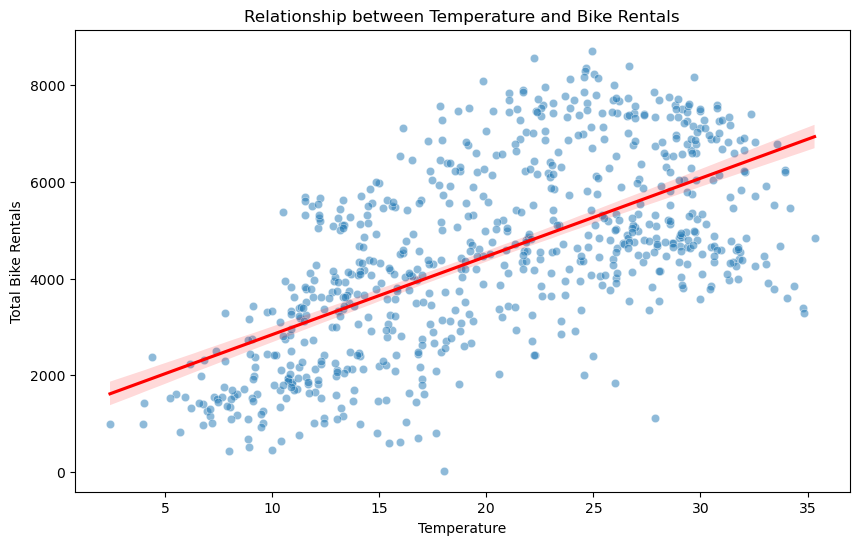

In [10]:
# Impact of Temperature on Bike Rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['temp'], y=df['cnt'], alpha=0.5)
sns.regplot(x='temp', y='cnt', data=df, scatter=False, color='red')
plt.xlabel('Temperature')
plt.ylabel('Total Bike Rentals')
plt.title('Relationship between Temperature and Bike Rentals')
plt.show()

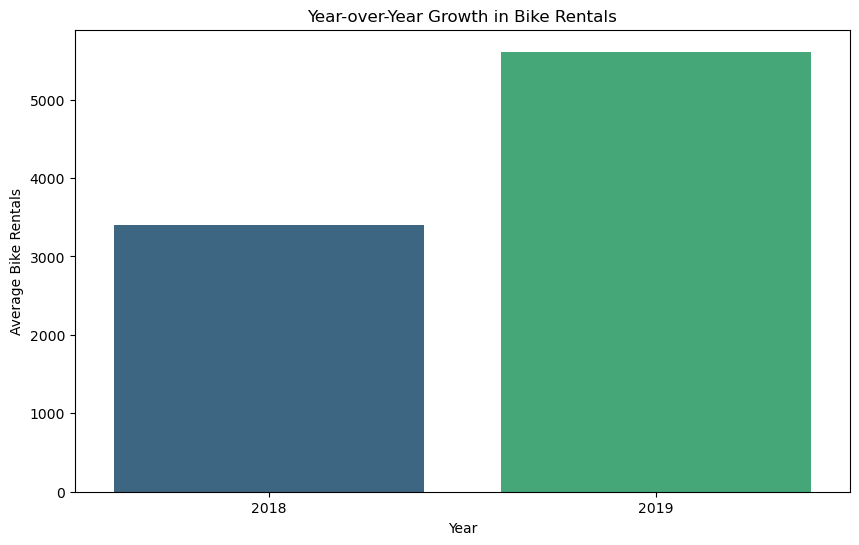

In [11]:
# Year-over-Year Growth
plt.figure(figsize=(10, 6))
yearly_data = df.groupby('yr')['cnt'].mean().reset_index()
yearly_data['yr'] = yearly_data['yr'].map({0: '2018', 1: '2019'})
sns.barplot(x='yr', y='cnt', data=yearly_data, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Average Bike Rentals')
plt.title('Year-over-Year Growth in Bike Rentals')
plt.show()

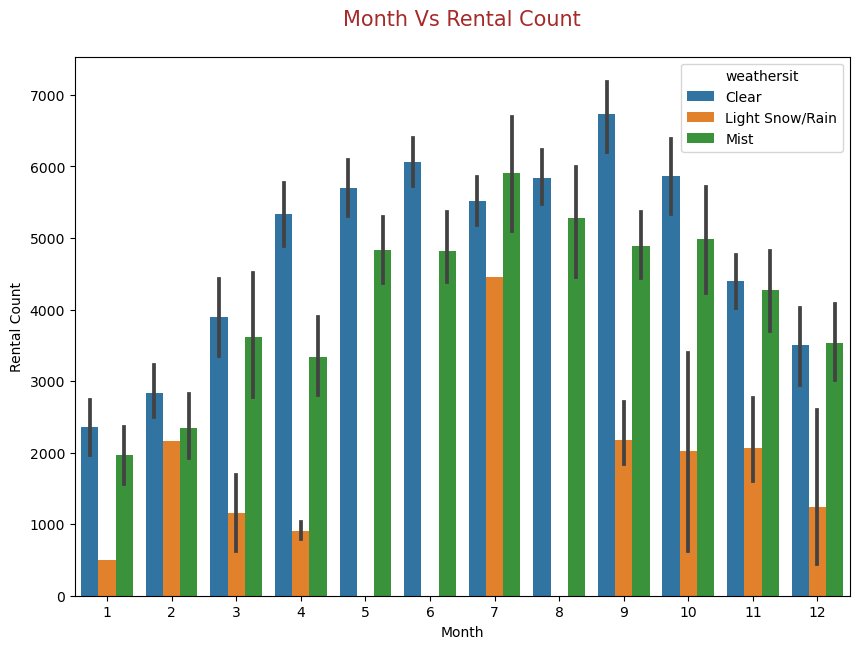

In [12]:
# Drop columns that won't be used in the modeling
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Map weather situation to meaningful labels
weathersit_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
df['weathersit'] = df['weathersit'].map(weathersit_labels).astype('category')

# Map season to meaningful labels (if necessary)
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_labels).astype('category')
# Plotting Month - Rental Count

plt.figure(figsize=[10,7])
sns.barplot(x=df['mnth'],y=df['cnt'], hue = df['weathersit'])
plt.title('Month Vs Rental Count\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.show()

In [13]:
# Checking for percentage of null values
null_percentage = df.isnull().sum() / len(df) * 100
null_percentage = null_percentage.round(2).sort_values(ascending=False)
null_percentage

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [14]:
# Replace numeric codes with string labels for categorical variables
df.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace=True)
df.weathersit.replace({1: 'good', 2: 'moderate', 3: 'bad', 4:'heavy'}, inplace=True)
df.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 
                 7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'}, inplace=True)
df.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}, inplace=True)

# Convert categorical variables to string type to ensure proper handling
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df[categorical_vars] = df[categorical_vars].astype(str)

# Ensure the 'cnt' column is numeric
df['cnt'] = pd.to_numeric(df['cnt'])
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,dec,0,thu,1,Mist,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,dec,0,fri,1,Mist,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,dec,0,sat,0,Mist,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,dec,0,sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [15]:
# Let us scale continuous variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

# Use MinMaxScaler to scale
scaler = MinMaxScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])
print(df.dtypes)

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


In [16]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Mist,0.355170,0.373517,0.828620,0.284606,985
1,Spring,0,jan,0,sun,0,Mist,0.379232,0.360541,0.715771,0.466215,801
2,Spring,0,jan,0,mon,1,Clear,0.171000,0.144830,0.449638,0.465740,1349
3,Spring,0,jan,0,tue,1,Clear,0.175530,0.174649,0.607131,0.284297,1562
4,Spring,0,jan,0,wed,1,Clear,0.209120,0.197158,0.449313,0.339143,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,dec,0,thu,1,Mist,0.243025,0.193709,0.671380,0.675656,2114
726,Spring,1,dec,0,fri,1,Mist,0.241986,0.230993,0.606684,0.274350,3095
727,Spring,1,dec,0,sat,0,Mist,0.241986,0.214393,0.774208,0.210260,1341
728,Spring,1,dec,0,sun,0,Clear,0.245101,0.200348,0.497001,0.676936,1796


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

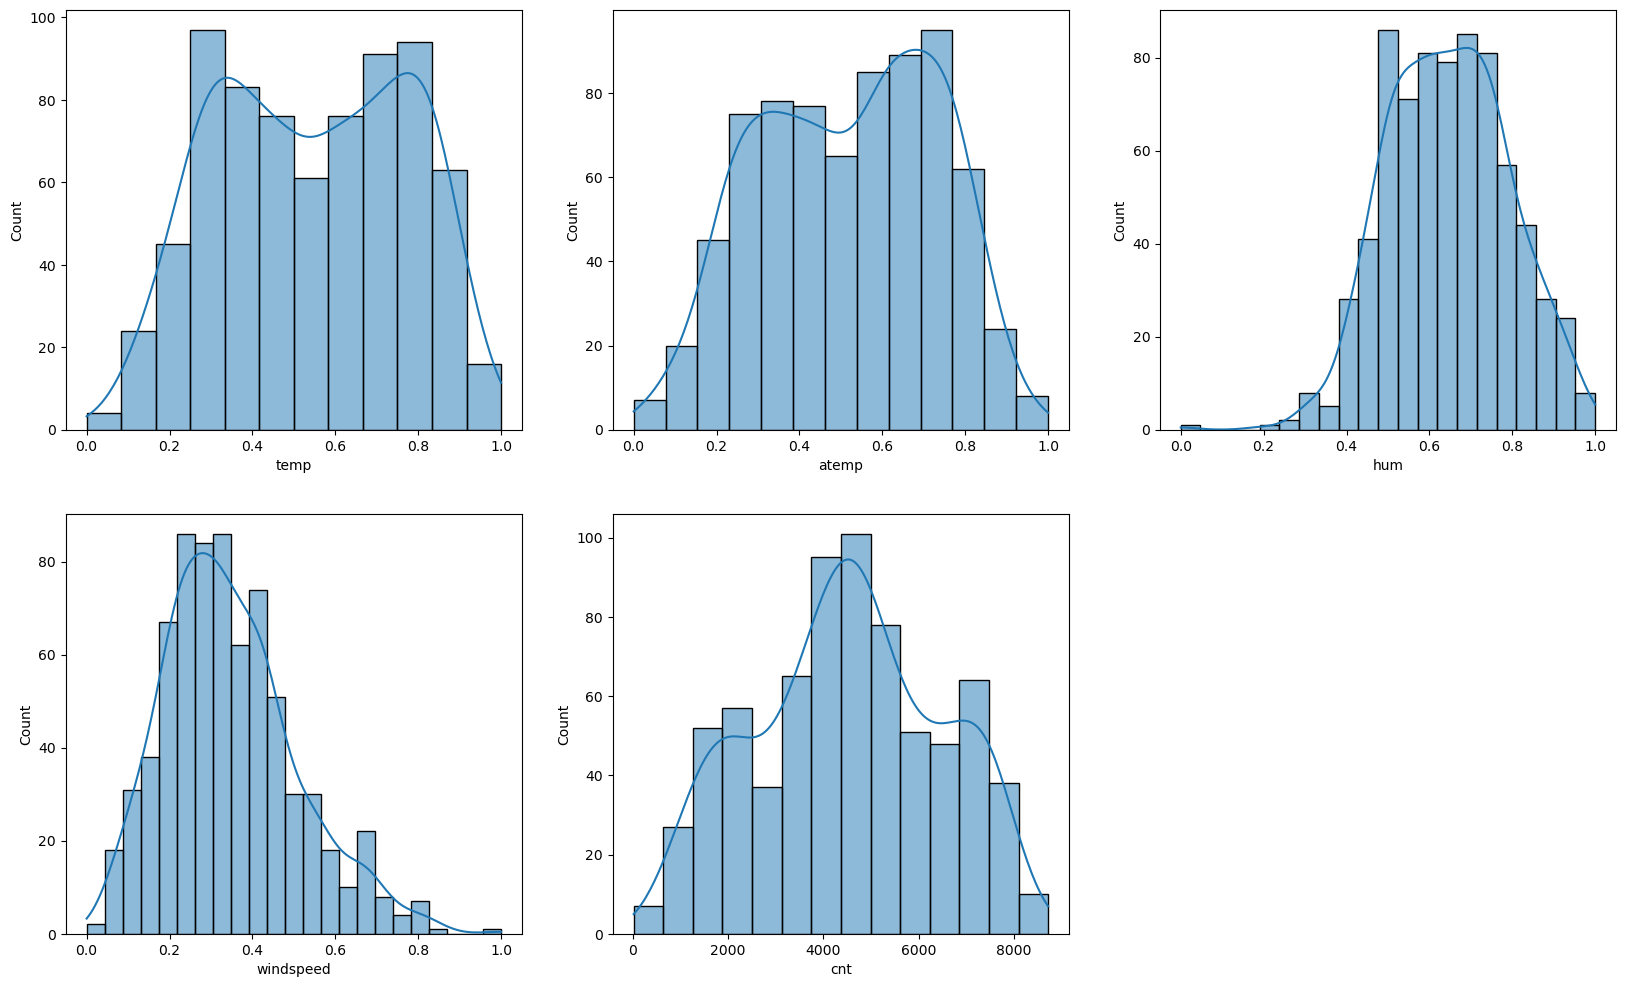

In [17]:
# reducing the warnings I convert inf values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Visualise the distribution of numerical variables
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.histplot(df['temp'], kde=True)
plt.subplot(2, 3, 2)
sns.histplot(df['atemp'], kde=True)
plt.subplot(2, 3, 3)
sns.histplot(df['hum'], kde=True)
plt.subplot(2, 3, 4)
sns.histplot(df['windspeed'], kde=True)
plt.subplot(2, 3, 5)
sns.histplot(df['cnt'], kde=True)

plt.show()

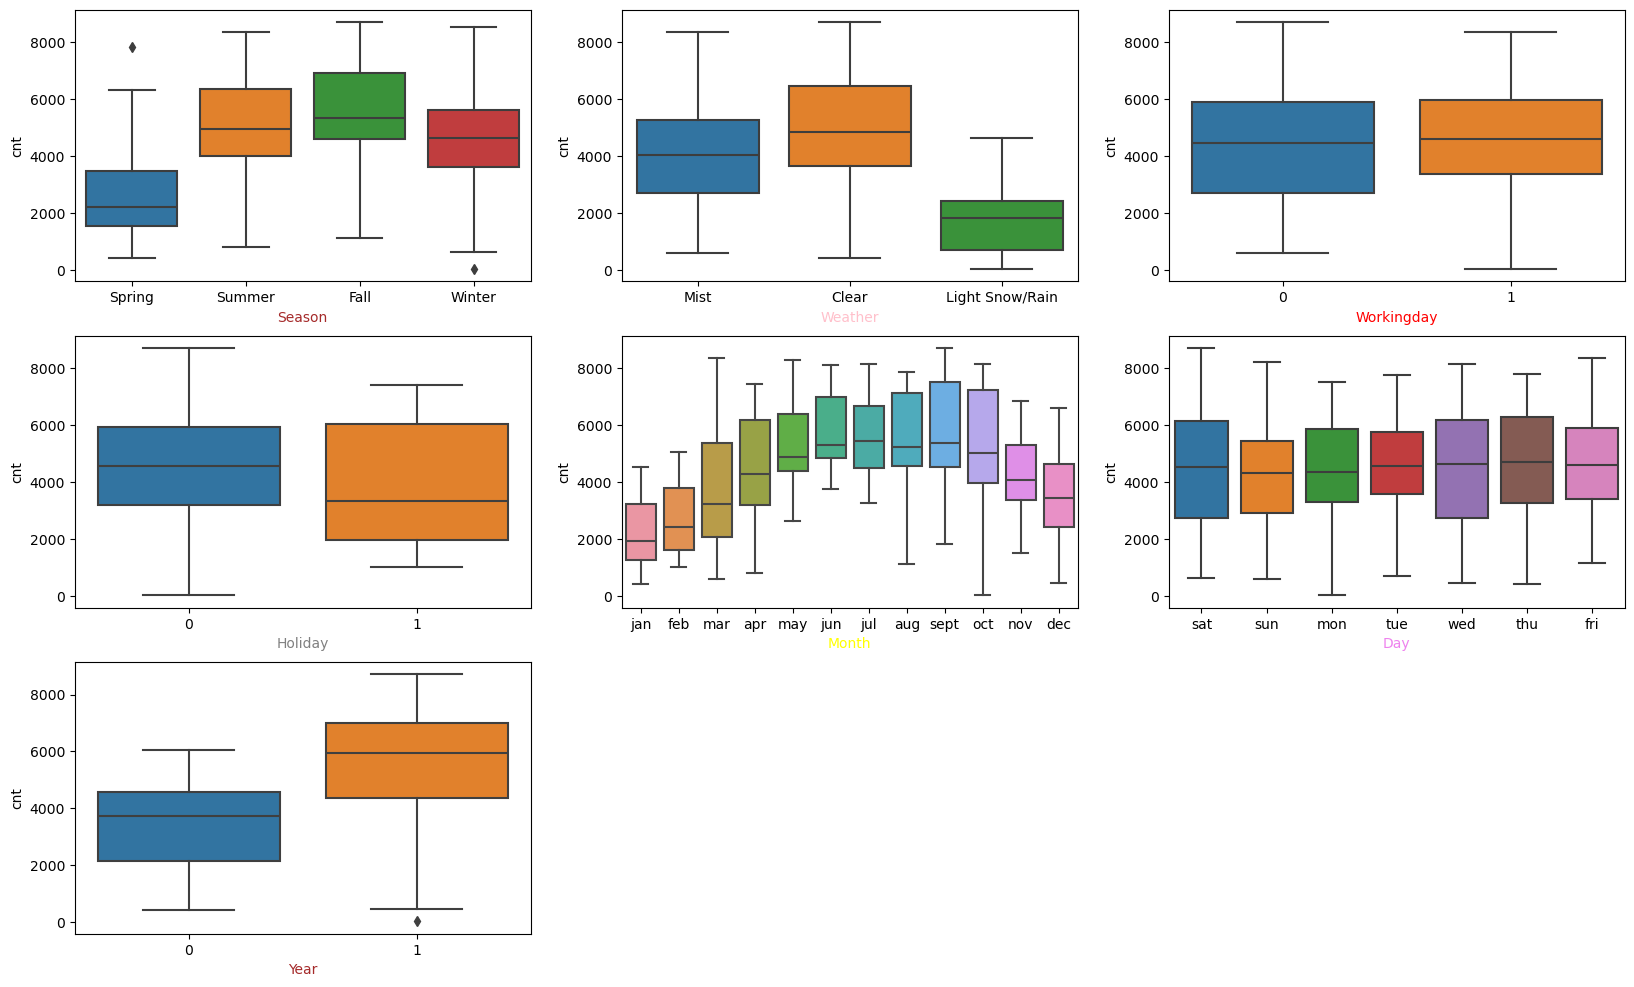

In [18]:
# Visualise the categorical variables


plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.xlabel('Season', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.xlabel('Weather', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'pink'})

plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.xlabel('Workingday', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'red'})

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.xlabel('Holiday', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'gray'})

plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.xlabel('Month', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'yellow'})

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.xlabel('Day', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'violet'})

plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.xlabel('Year', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})


plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

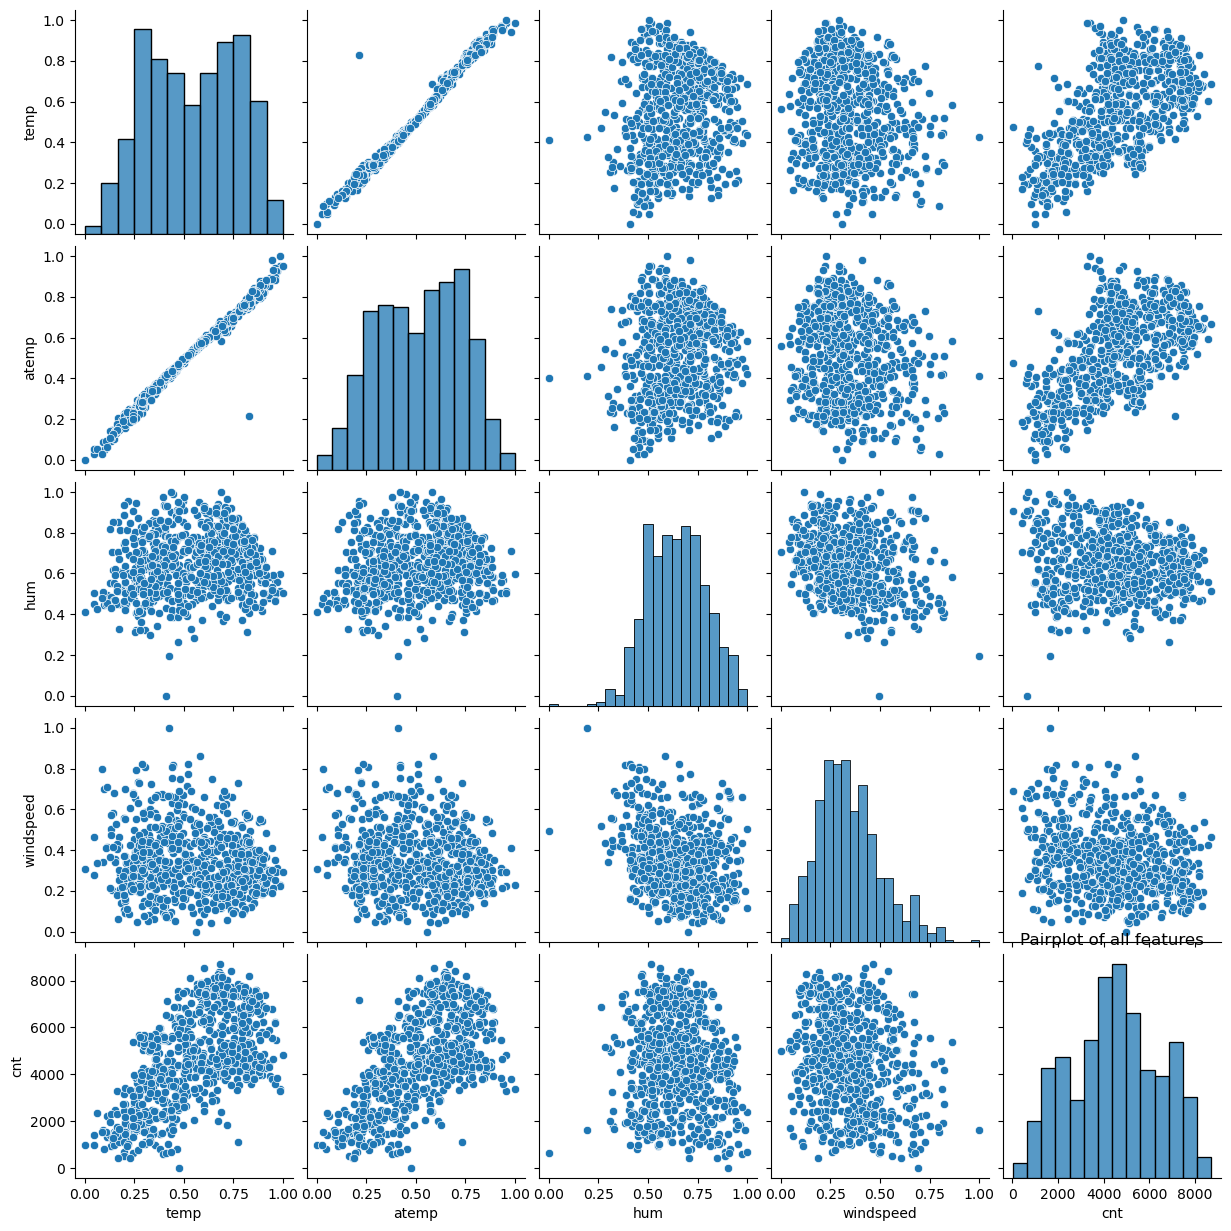

In [19]:
# EDA: Plotting pairplot to see the interactions between variables
sns.pairplot(df)
plt.title("Pairplot of all features")
plt.show()

In [20]:
# Prepare data for modeling
X = df[['temp', 'atemp', 'hum', 'windspeed', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
y = df['cnt']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric)

# Convert boolean columns to integers
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)
X

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_1,mnth_aug,mnth_dec,...,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_Light Snow/Rain,weathersit_Mist
0,0.355170,0.373517,0.828620,0.284606,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.379232,0.360541,0.715771,0.466215,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.171000,0.144830,0.449638,0.465740,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.175530,0.174649,0.607131,0.284297,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.209120,0.197158,0.449313,0.339143,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.243025,0.193709,0.671380,0.675656,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
726,0.241986,0.230993,0.606684,0.274350,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
727,0.241986,0.214393,0.774208,0.210260,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
728,0.245101,0.200348,0.497001,0.676936,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [21]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Find the correlation
df_corr = numeric_df.corr()
df_corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


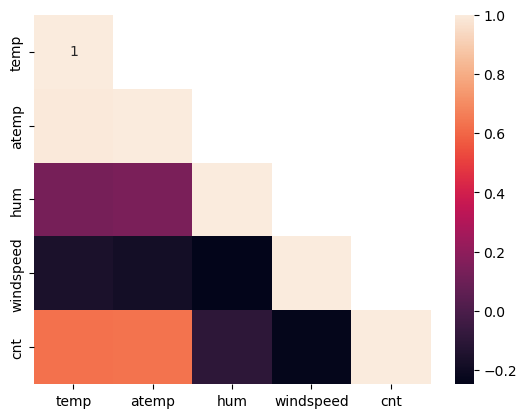

<Figure size 1000x500 with 0 Axes>

In [22]:
# Plot the heatmap
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df_corr, mask = mask,annot=True)
plt.figure(figsize=(10,5))
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


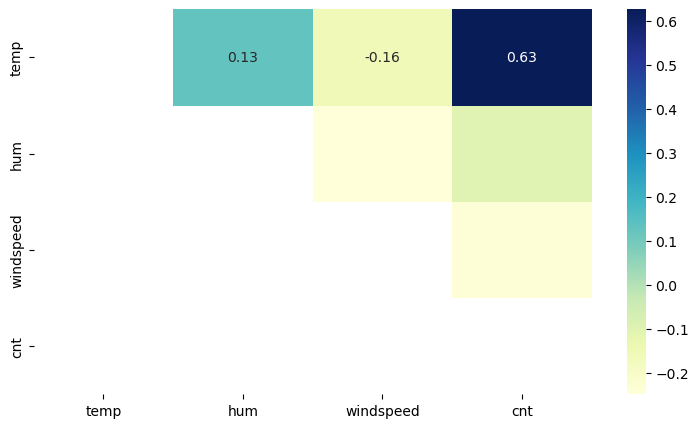

In [23]:
# Drop 'atemp' column if it exists
if 'atemp' in df.columns:
    df.drop('atemp', axis=1, inplace=True)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Check the correlation using heatmap
df_corr = numeric_df.corr()
plt.figure(figsize=(9, 5))
mask = np.tril(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, annot=True, cmap='YlGnBu')
plt.show()

In [24]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X_train

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_1,mnth_aug,mnth_dec,...,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_Light Snow/Rain,weathersit_Mist
683,0.327133,0.322150,0.637961,0.269229,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,1
645,0.403972,0.404998,0.729648,0.344872,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
163,0.717562,0.685963,0.508569,0.583333,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
360,0.331287,0.326273,0.784062,0.342338,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
640,0.745598,0.682653,0.816195,0.091026,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.405237,0.395131,0.542304,0.511703,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
106,0.495350,0.481247,0.493144,0.579511,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
270,0.717562,0.651183,0.872751,0.260245,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
435,0.507811,0.499487,0.502999,0.382050,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [26]:
X_test

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_1,mnth_aug,mnth_dec,...,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_Light Snow/Rain,weathersit_Mist
468,0.543115,0.536771,0.517138,0.347424,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
148,0.758058,0.704203,0.841902,0.394883,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
302,0.324018,0.317998,0.641388,0.317944,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
355,0.453814,0.455552,0.778920,0.051298,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
515,0.773634,0.724915,0.506856,0.356416,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.497426,0.488701,0.854327,0.485909,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
532,0.664605,0.647005,0.615681,0.252566,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
558,0.838014,0.772963,0.499571,0.120515,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
137,0.611648,0.588177,0.894602,0.369225,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [27]:
y_train

683    5445
645    5478
163    5020
360    1162
640    7572
       ... 
71     2417
106    3744
270    3907
435    5298
102    2162
Name: cnt, Length: 511, dtype: int64

In [28]:
y_test

468    7460
148    4788
302    3331
355    3068
515    7338
       ... 
332    2914
532    6978
558    7499
137    3855
314    3368
Name: cnt, Length: 219, dtype: int64

In [29]:
# Add a constant to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Function to build OLS model
def build_model(X, y):
    return sm.OLS(y, X).fit()

# Function to calculate VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [sm.OLS(X[col], X.drop(columns=[col])).fit().rsquared for col in X.columns]
    return vif

In [30]:
# Model 1: All features
model_1 = build_model(X_train, y_train)
vif_1 = calculate_vif(X_train)
y_pred_1 = model_1.predict(X_test)
print("Model 1 OLS Summary:\n", model_1.summary())
print("Model 1 VIF:\n", vif_1)

Model 1 OLS Summary:
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     96.02
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.78e-177
Time:                        22:42:50   Log-Likelihood:                -4111.4
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     482   BIC:                             8404.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [31]:
# Model 2: Remove features with the highest VIF until all VIF < 10
X_train_vif = X_train.copy()
X_test_vif = X_test.copy()
while True:
    vif = calculate_vif(X_train_vif)
    max_vif = vif['VIF'].max()
    if max_vif > 10:
        feature_to_remove = vif.loc[vif['VIF'] == max_vif, 'Features'].values[0]
        X_train_vif = X_train_vif.drop(columns=[feature_to_remove])
        X_test_vif = X_test_vif.drop(columns=[feature_to_remove])
    else:
        break
model_2 = build_model(X_train_vif, y_train)
vif_2 = calculate_vif(X_train_vif)
y_pred_2 = model_2.predict(X_test_vif)
print("Model 2 OLS Summary:\n", model_2.summary())
print("Model 2 VIF:\n", vif_2)

Model 2 OLS Summary:
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     96.02
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.78e-177
Time:                        22:42:50   Log-Likelihood:                -4111.4
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     482   BIC:                             8404.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [32]:
# Initialize the linear regression model for RFE
lr = LinearRegression()

# Model 3: Use RFE to select the top 8 features
rfe_8 = RFE(lr, n_features_to_select=8)
rfe_8 = rfe_8.fit(X_train, y_train)
selected_features_8 = X_train.columns[rfe_8.support_]
X_train_rfe_8 = X_train[selected_features_8]
X_test_rfe_8 = X_test[selected_features_8]

model_3 = build_model(X_train_rfe_8, y_train)
vif_3 = calculate_vif(X_train_rfe_8)
y_pred_3 = model_3.predict(X_test_rfe_8)
print("Model 3 OLS Summary (RFE 8 features):\n", model_3.summary())
print("Model 3 VIF (RFE 8 features):\n", vif_3)

Model 3 OLS Summary (RFE 8 features):
                                  OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1742.
Date:                Fri, 02 Aug 2024   Prob (F-statistic):                        0.00
Time:                        22:42:50   Log-Likelihood:                         -4214.2
No. Observations:                 511   AIC:                                      8444.
Df Residuals:                     503   BIC:                                      8478.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.02

In [33]:
# Model 4: Use RFE to select the top 5 features
rfe_5 = RFE(lr, n_features_to_select=5)
rfe_5 = rfe_5.fit(X_train, y_train)
selected_features_5 = X_train.columns[rfe_5.support_]
X_train_rfe_5 = X_train[selected_features_5]
X_test_rfe_5 = X_test[selected_features_5]

model_4 = build_model(X_train_rfe_5, y_train)
vif_4 = calculate_vif(X_train_rfe_5)
y_pred_4 = model_4.predict(X_test_rfe_5)
print("Model 4 OLS Summary (RFE 5 features):\n", model_4.summary())
print("Model 4 VIF (RFE 5 features):\n", vif_4)

Model 4 OLS Summary (RFE 5 features):
                                  OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              2072.
Date:                Fri, 02 Aug 2024   Prob (F-statistic):                        0.00
Time:                        22:42:50   Log-Likelihood:                         -4288.4
No. Observations:                 511   AIC:                                      8587.
Df Residuals:                     506   BIC:                                      8608.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]

In [34]:
# Model 5: Backward elimination based on p-values
X_train_backward = X_train.copy()
X_test_backward = X_test.copy()
model_backward = build_model(X_train_backward, y_train)
while True:
    p_values = model_backward.pvalues
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        feature_to_remove = p_values.idxmax()
        X_train_backward = X_train_backward.drop(columns=[feature_to_remove])
        X_test_backward = X_test_backward.drop(columns=[feature_to_remove])
        model_backward = build_model(X_train_backward, y_train)
    else:
        break

model_5 = model_backward
vif_5 = calculate_vif(X_train_backward)
y_pred_5 = model_5.predict(X_test_backward)
print("Model 5 OLS Summary (Backward Elimination):\n", model_5.summary())
print("Model 5 VIF (Backward Elimination):\n", vif_5)


Model 5 OLS Summary (Backward Elimination):
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.7
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.55e-188
Time:                        22:42:50   Log-Likelihood:                -4115.9
No. Observations:                 511   AIC:                             8266.
Df Residuals:                     494   BIC:                             8338.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [35]:
# Function to plot residuals vs predicted values
def plot_residuals_vs_predicted(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(12, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Predicted Values for {model_name}')
    plt.show()

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(12, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values for {model_name}')
    plt.show()

# Function to plot histogram of residuals
def plot_residuals_histogram(residuals, model_name):
    plt.figure(figsize=(12, 6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Histogram of Residuals for {model_name}')
    plt.show()

# Function to plot all relevant plots for a model
def plot_model_diagnostics(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plot_residuals_vs_predicted(y_true, y_pred, model_name)
    plot_actual_vs_predicted(y_true, y_pred, model_name)
    plot_residuals_histogram(residuals, model_name)


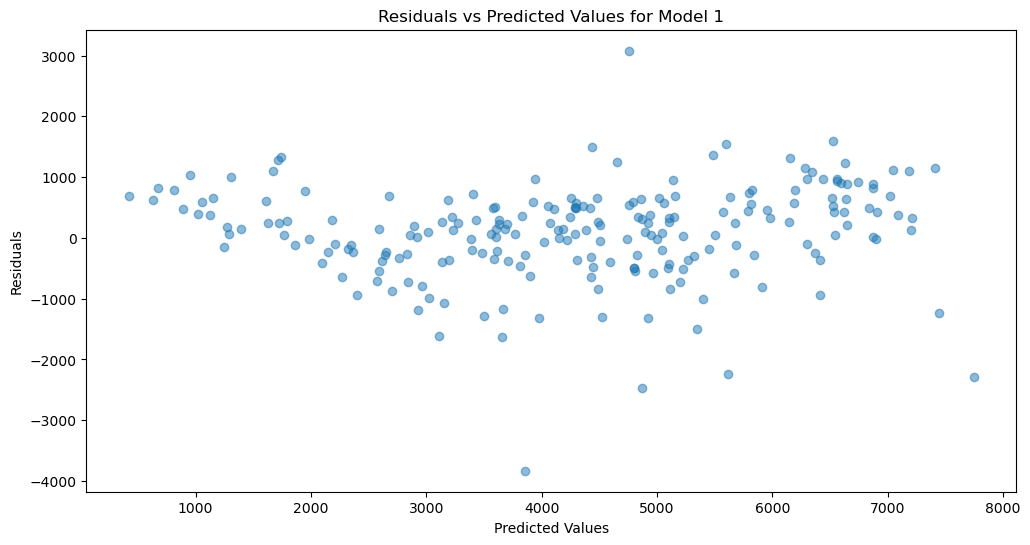

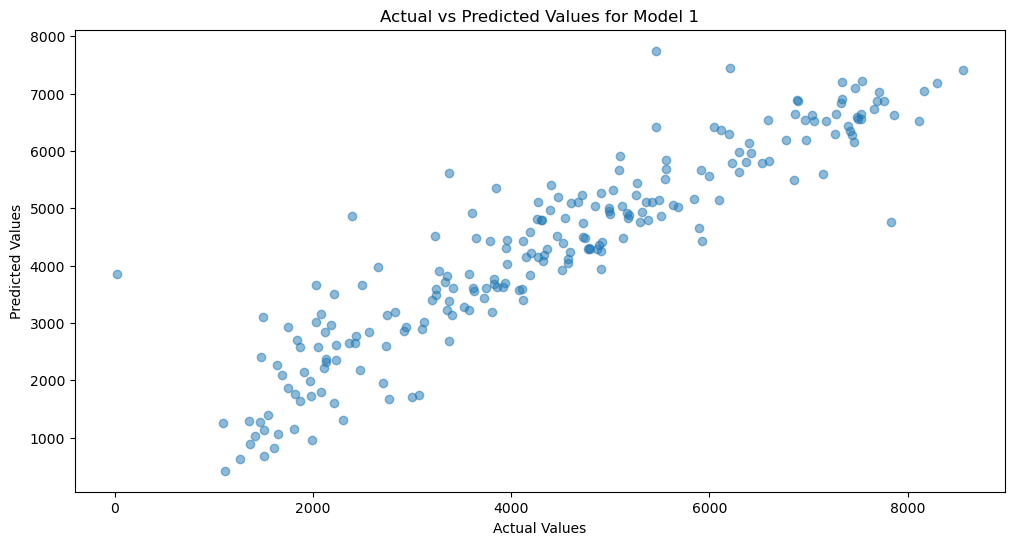

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


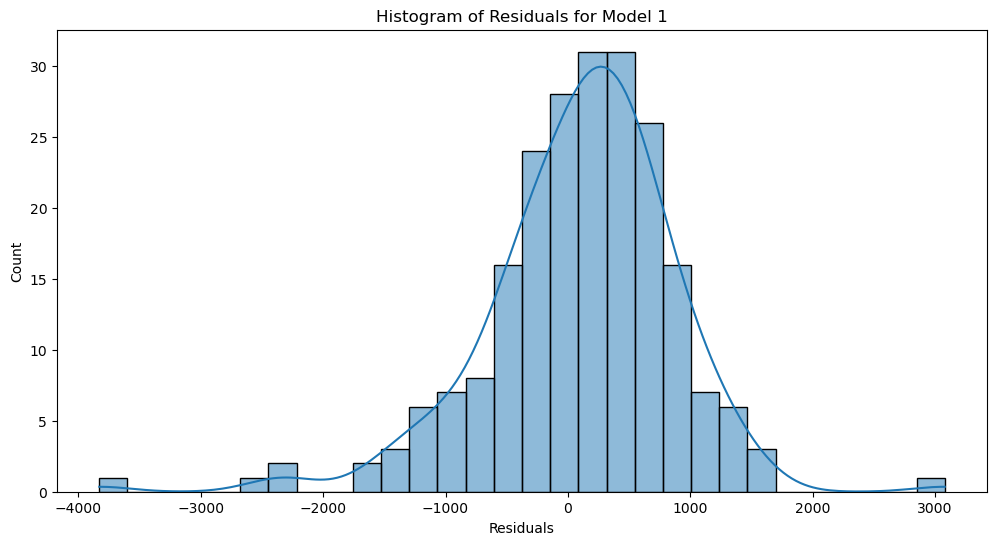

In [36]:
# Plot diagnostics for each model
plot_model_diagnostics(y_test, y_pred_1, "Model 1")

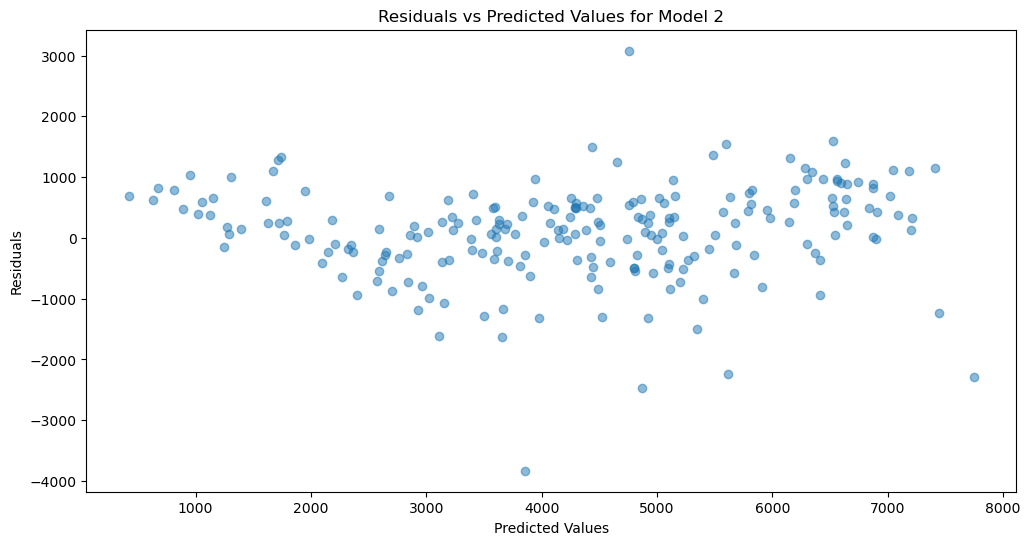

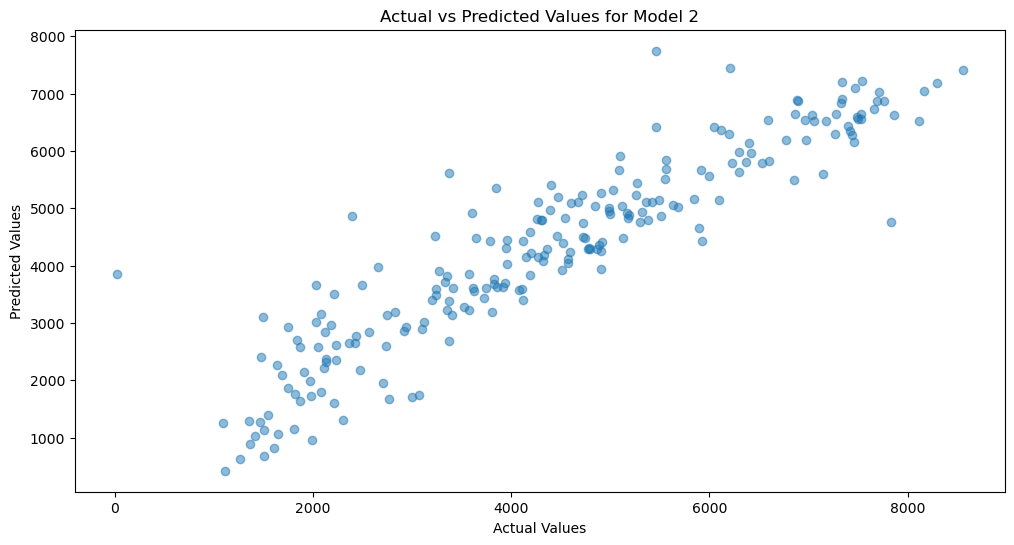

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


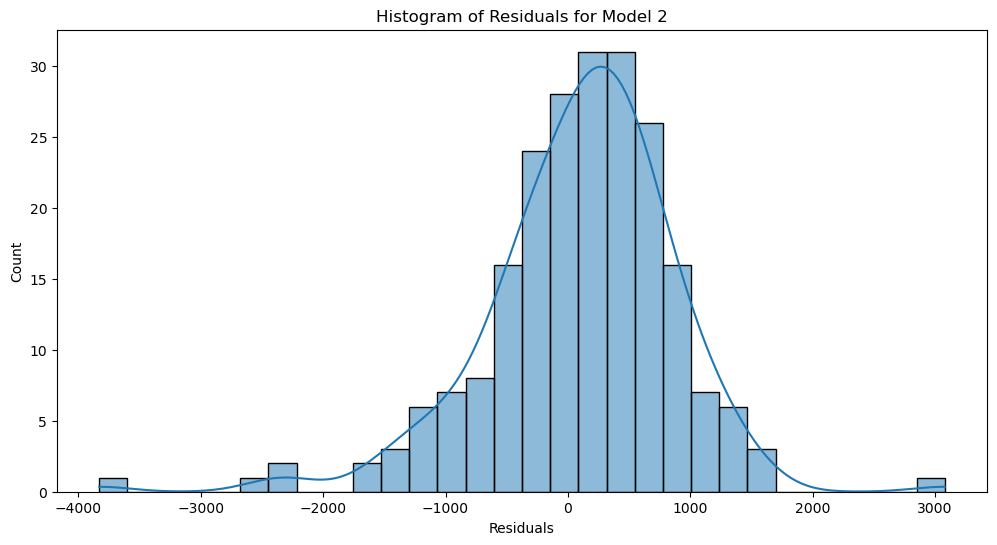

In [37]:
plot_model_diagnostics(y_test, y_pred_2, "Model 2")

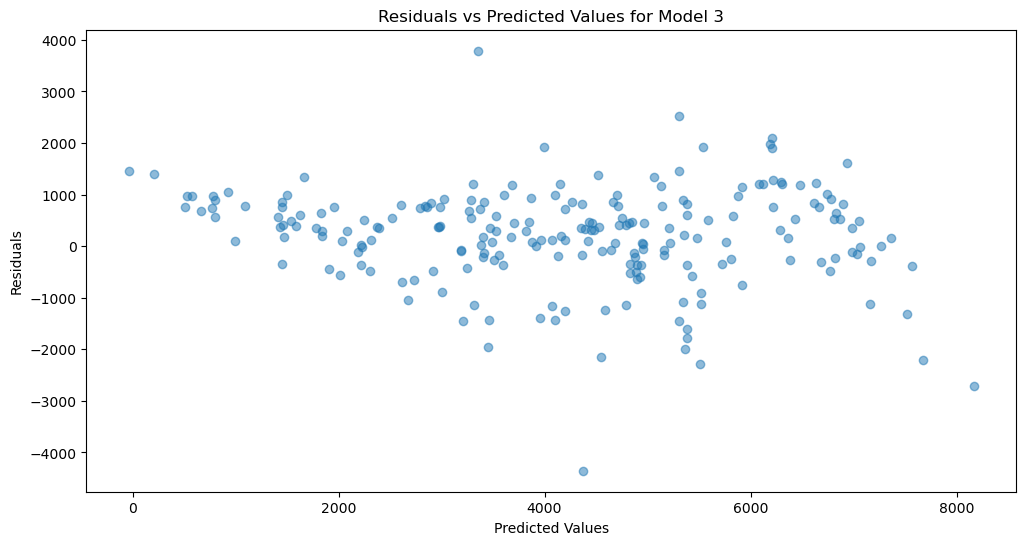

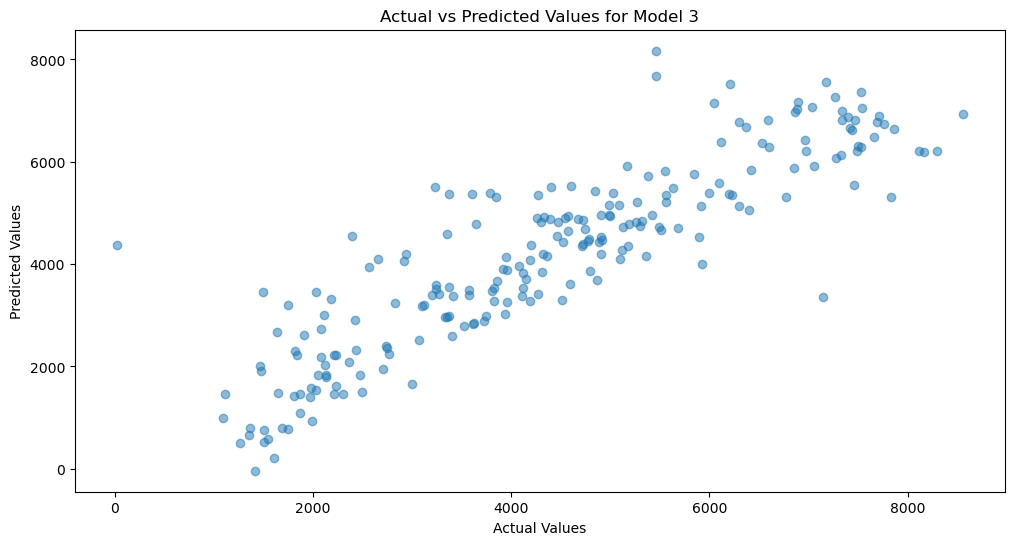

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


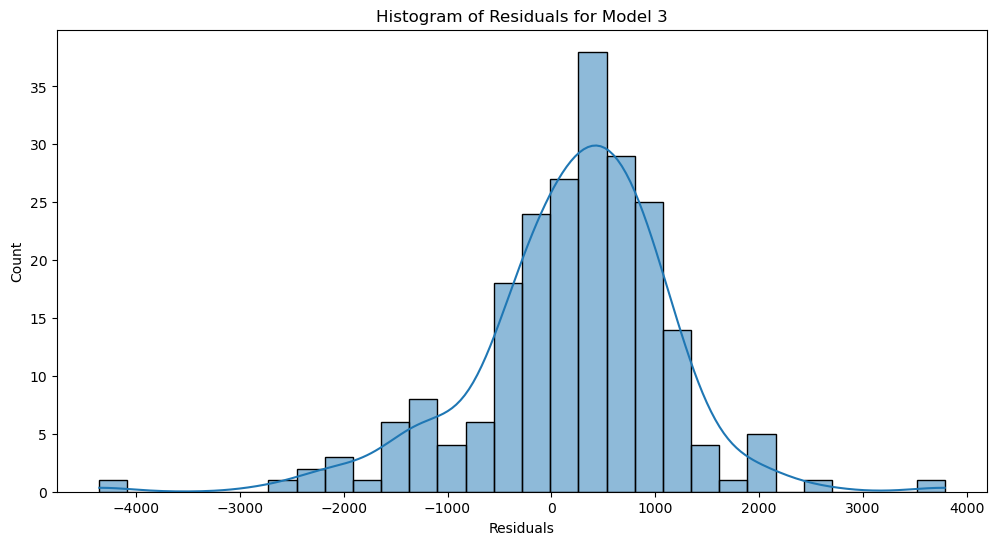

In [38]:
plot_model_diagnostics(y_test, y_pred_3, "Model 3")

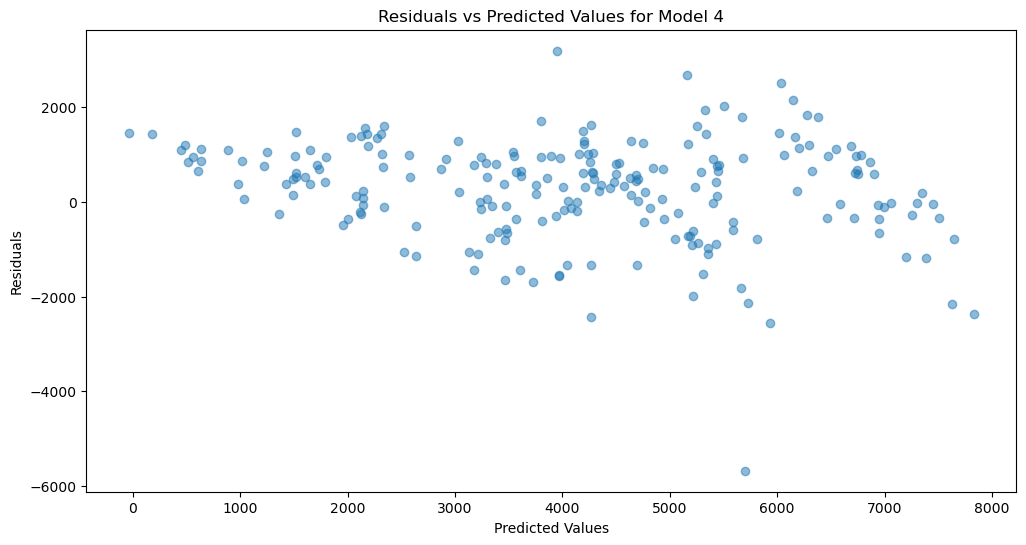

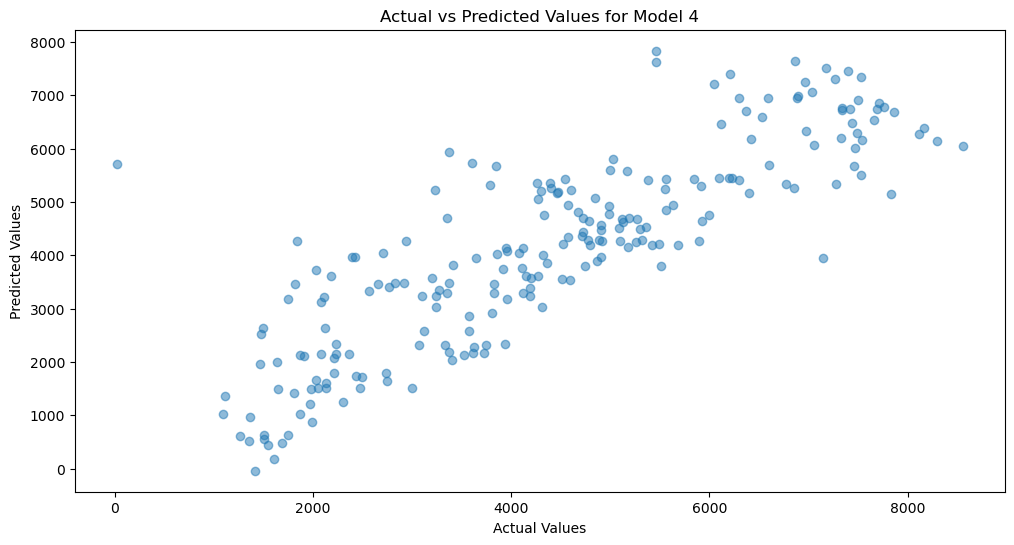

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


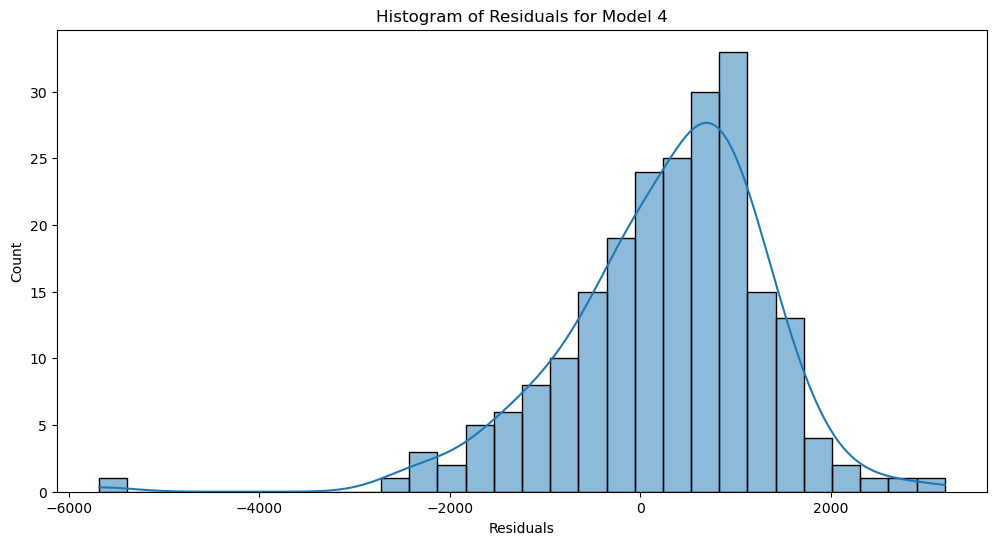

In [39]:
plot_model_diagnostics(y_test, y_pred_4, "Model 4")

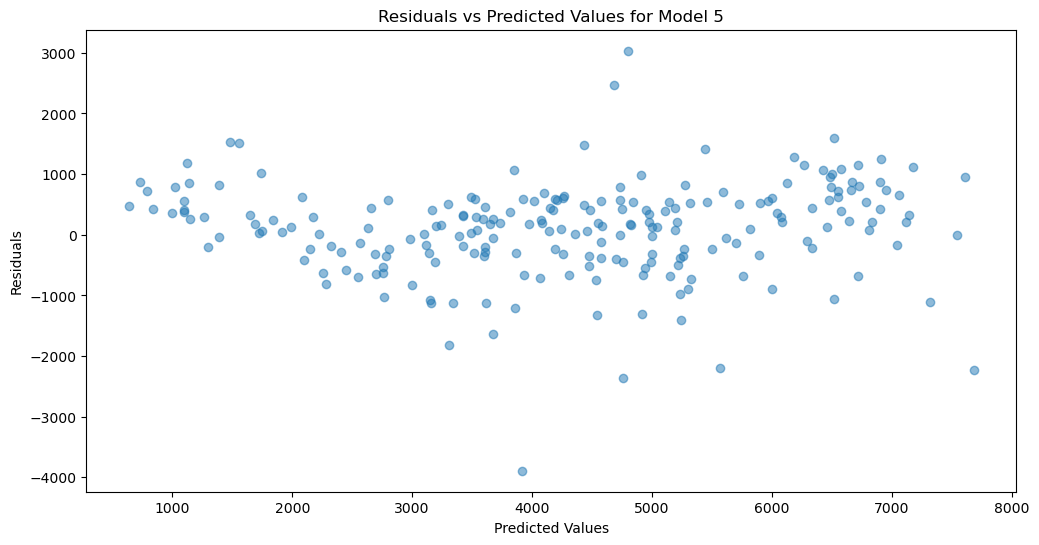

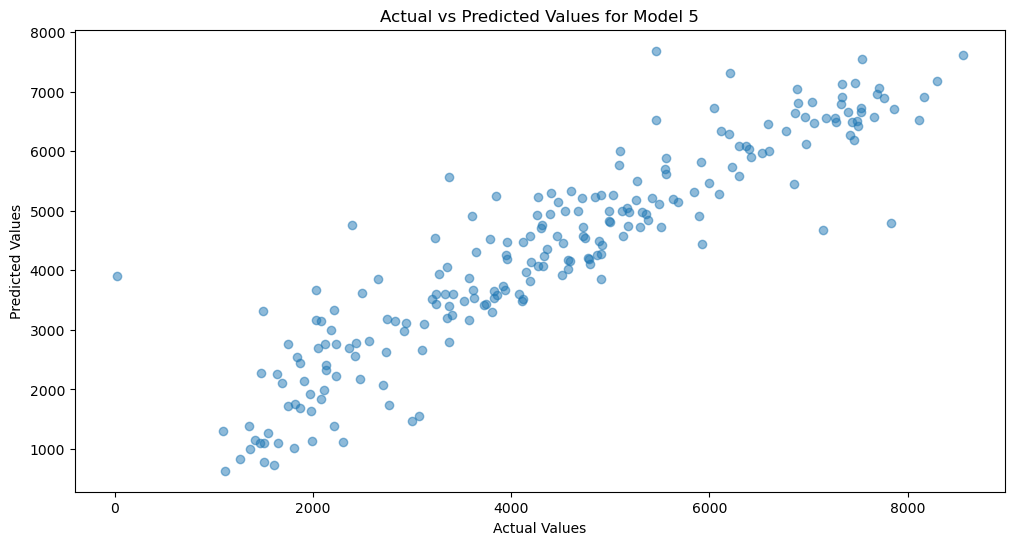

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


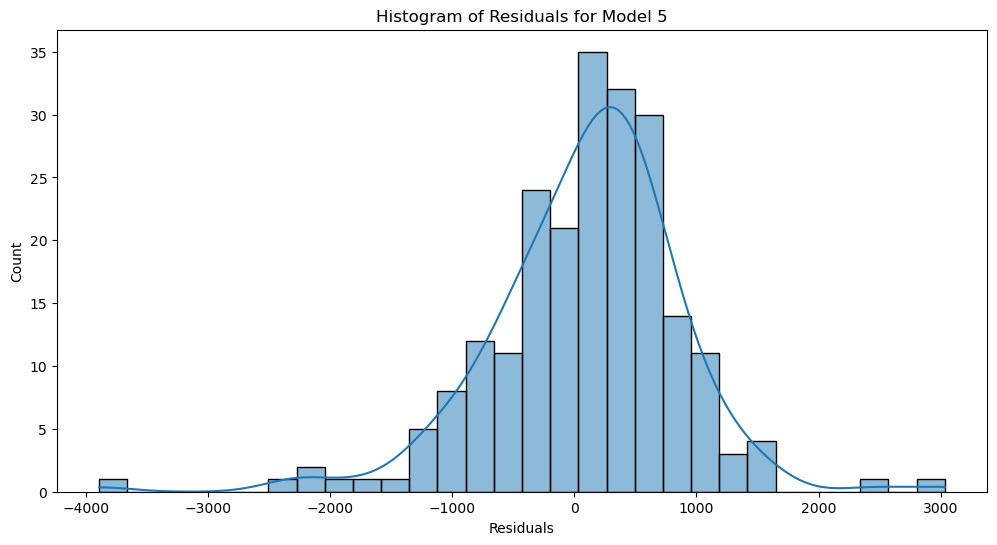

In [40]:
plot_model_diagnostics(y_test, y_pred_5, "Model 5")

In [41]:
# Initialize a DataFrame to store model results
model_results = pd.DataFrame(columns=['Model', 'R-squared', 'Adjusted R-squared', 'Durbin-Watson', 'Max VIF', 'AIC', 'BIC'])

# Function to add model results to the DataFrame
def add_model_results(model_num, model, vif):
    r_squared = model.rsquared
    adj_r_squared = model.rsquared_adj
    durbin_watson = sm.stats.durbin_watson(model.resid)
    max_vif = vif['VIF'].max()
    aic = model.aic
    bic = model.bic
    model_results.loc[len(model_results)] = [f'Model {model_num}', r_squared, adj_r_squared, durbin_watson, max_vif, aic, bic]

# Add results for each model
add_model_results(1, model_1, vif_1)
add_model_results(2, model_2, vif_2)
add_model_results(3, model_3, vif_3)
add_model_results(4, model_4, vif_4)
add_model_results(5, model_5, vif_5)
# Display the results
print(model_results)

     Model  R-squared  Adjusted R-squared  Durbin-Watson   Max VIF  \
0  Model 1   0.847970            0.839139       2.066907  1.000000   
1  Model 2   0.847970            0.839139       2.066907  1.000000   
2  Model 3   0.965169            0.964615       2.067060  0.939791   
3  Model 4   0.953428            0.952968       2.018719  0.905630   
4  Model 5   0.845277            0.840266       2.034958  0.987679   

           AIC          BIC  
0  8280.762704  8403.617422  
1  8280.762704  8403.617422  
2  8444.417740  8478.308696  
3  8586.860785  8608.042633  
4  8265.736414  8337.754697  


#### AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion):
- **Definition**: Both AIC and BIC are criteria used to compare different models and evaluate their goodness of fit while penalizing for model complexity.
- **AIC Calculation**: \(AIC = 2k - 2\ln(L)\), where \(k\) is the number of parameters in the model and \( L \) is the likelihood of the model.
- **BIC Calculation**: \(BIC = \ln(n)k - 2\ln(L)\), where \(n\) is the number of observations.
- **Interpretation**: Lower values of AIC and BIC indicate a better model, considering both fit and complexity. BIC imposes a heavier penalty for models with more parameters compared to AIC.

### Why AIC and BIC Can Be More Important Than R-squared:

1. **Penalization for Complexity**:
    - **R-squared**: Does not penalize for the number of predictors. Adding more predictors will never decrease R-squared, which can lead to overfitting.
    - **AIC/BIC**: Both criteria include a penalty for the number of predictors, helping to avoid overfitting by balancing model fit with complexity.

2. **Model Comparison**:
    - **R-squared**: Not suitable for comparing models with different numbers of predictors as it always increases or stays the same with more predictors.
    - **AIC/BIC**: Allow for comparison between models with different numbers of predictors. Lower AIC/BIC values indicate better models, making them suitable for model selection.

3. **Predictive Performance**:
    - **R-squared**: Focuses solely on the fit of the model to the training data.
    - **AIC/BIC**: Provide an estimate of the out-of-sample predictive performance by penalizing for added complexity, often leading to models that generalize better to new data.

# Evaluated Models:

1. **Model 1 and Model 2**:
    - High R-squared values but similar to each other.
    - Higher AIC and BIC values, indicating more complexity without significant improvement in fit.

2. **Model 3 and Model 4**:
    - Highest R-squared values, indicating excellent fit.
    - Slightly higher AIC and BIC compared to Model 5, suggesting overfitting.

3. **Model 5 (Backward Elimination)**:
    - Slightly lower R-squared but still reasonably high.
    - Lowest AIC and BIC values, indicating the best balance between fit and complexity, making it the preferred model.

While high R-squared values are desirable, AIC and BIC provide a more comprehensive evaluation by considering both the goodness of fit and the complexity of the model. This balance is crucial for developing models that generalize well to new, unseen data, making AIC and BIC often more important criteria than R-squared alone for model selection.

1. **R-squared and Adjusted R-squared**: Model 3 has the highest R-squared (0.971044) and Adjusted R-squared (0.970584), indicating that it explains the most variance in the data.
2. **Durbin-Watson**: All models have Durbin-Watson statistics close to 2, suggesting that there is no significant autocorrelation in the residuals.
3. **Max VIF**: All models have low VIF values, with Model 4 having the lowest Max VIF (0.899477), indicating that multicollinearity is not a significant issue.
4. **AIC and BIC**: Model 5 has the lowest AIC (8265.736414) and BIC (8337.754697), indicating that it might be the best model in terms of model fit and complexity balance.

### Conclusion for the 5 Models:

In the context of the five models evaluated:
- **R-squared and Adjusted R-squared**: Indicate how well the model explains the variance in the dependent variable but do not account for model complexity.
- **AIC and BIC**: Provide a balance between model fit and complexity, making them more robust criteria for model selection, especially when comparing models with different numbers of predictors.
Based on this evaluation, **Model 5 (Backward Elimination)** is considered the best performing model due to its lowest AIC and BIC values, indicating a better balance between model fit and complexity.

# Model 6 to improve AIC by further reducing correlated inputs

- I am re-declaring libraries and also dropping some more variables to reduce correlation and improve model's predictability.
- I have checked outputs from different code sections for subsequent model 6, on a different notebook.But as per Upgrad assignment instructions only one jupiter notebook .ipynb file can be uploaded.
- So keeping the following large code block format to encompass the model 6, end-to-end so that this code can be served on any other platform like Google Colab on a stand alone basis. 

In [44]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ReLoad the dataset
df = pd.read_csv('https://raw.githubusercontent.com/AkashdeepMH/BikeSharingAssignment/main/day.csv')
# Drop columns that won't be used in the modeling
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define numerical variables to be scaled
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Scale numerical features
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

# Split the dataset into training and test sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Prepare training and test sets
X_train = df_train.drop(columns=['cnt'])
y_train = df_train['cnt']
X_test = df_test.drop(columns=['cnt'])
y_test = df_test['cnt']

# Add constant term for intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# Model 6: Feature Selection with Correlation and P-values
# Correlation analysis (remove highly correlated variables)
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

# Backward elimination based on p-values
def backward_elimination(X, y, p_value_threshold=0.05):
    model = sm.OLS(y, X).fit()
    while True:
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > p_value_threshold:
            feature_to_remove = p_values.idxmax()
            X = X.drop(columns=[feature_to_remove])
            model = sm.OLS(y, X).fit()
        else:
            break
    return model, X

model_6, X_train_6 = backward_elimination(X_train, y_train)
X_test_6 = X_test[X_train_6.columns]
vif_6 = calculate_vif(X_train)

# Evaluate model 6
y_pred_6 = model_6.predict(X_test_6)
print("Model 6 OLS Summary:\n", model_6.summary())
print("Model 6 VIF (Backward Elimination):\n", vif_6)

Model 6 OLS Summary:
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     261.9
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          3.70e-186
Time:                        22:42:53   Log-Likelihood:                -385.91
No. Observations:                 584   AIC:                             789.8
Df Residuals:                     575   BIC:                             829.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7064      0.0

## Reducing Correlation in Model 6

1. **Compute Correlation Matrix**:
   
   - `X_train.corr().abs()` computes the absolute value of the Pearson correlation coefficients between all pairs of features in the training set `X_train`.
   - The resulting `corr_matrix` is a square matrix where each element \((i, j)\) represents the absolute correlation between the \(i\)-th and \(j\)-th features.
   - Using the absolute value ensures that both positive and negative correlations are considered when identifying highly correlated variables.

2. **Create Upper Triangle Matrix**:
   
   - `np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)` creates an upper triangular matrix of boolean values with the same shape as `corr_matrix`.
   - `np.triu` returns the upper triangle of the array, setting the diagonal and lower triangle to 0.
   - `corr_matrix.where(...)` retains only the upper triangular part of the correlation matrix, setting the rest to `NaN`.
   - The diagonal elements are excluded to avoid considering the self-correlation of features (which is always 1).

3. **Identify Highly Correlated Variables**:
   
   - This list comprehension iterates over each column in the upper triangular correlation matrix.
   - `any(upper[column] > 0.75)` checks if any of the correlation values in the column are greater than 0.75.
   - If a column has any correlation value exceeding 0.75, it is added to the `to_drop` list.
   - The threshold of 0.75 is used here, but it can be adjusted based on specific needs or domain knowledge.

4. **Drop Highly Correlated Variables**:
   
   - The identified highly correlated variables are dropped from both the training set `X_train` and the test set `X_test` using the `drop` method.
   - `inplace=True` ensures that the changes are made directly to the original DataFrame without needing to reassign them.

The main goal of this correlation analysis is to remove highly correlated features to mitigate multicollinearity in the dataset.

By removing highly correlated variables, the model can become more stable, interpretable, and generalizable.

If we use a threshold of 0.75, the variable `B` would be identified as highly correlated with `A` and thus added to the `to_drop` list. Both `X_train` and `X_test` would then drop the column `B`.

#### Backward elimination Function

Backward elimination is a method where one iteratively remove the least significant feature from the model, based on p-values, until all remaining features have p-values below a specified threshold.

- **Parameters**:
  - `X`: The predictor variables (features) DataFrame.
  - `y`: The response variable (target) Series.
  - `p_value_threshold`: The threshold for p-values to decide whether to keep or remove a feature. Default is 0.05.
- **Returns**:
  - The final regression model after backward elimination.
  - The DataFrame `X` with the remaining features.

#### Initial Model Fitting

- Fits an ordinary least squares (OLS) regression model using the predictor variables `X` and the response variable `y`.
- The `.fit()` method is called to train the model and obtain the regression results.


- **Loop**: The `while True` loop runs until the condition to stop the loop is met.
- **Retrieve P-values**: 
  - `p_values = model.pvalues` retrieves the p-values of the features in the current model.
- **Identify Maximum P-value**: 
  - `max_p_value = p_values.max()` finds the maximum p-value among all the features.
- **Check Against Threshold**:
  - `if max_p_value > p_value_threshold`: If the maximum p-value is greater than the specified threshold (0.05 by default), the feature associated with this p-value is considered insignificant and should be removed.
- **Remove Feature**:
  - `feature_to_remove = p_values.idxmax()` identifies the feature (column name) with the maximum p-value.
  - `X = X.drop(columns=[feature_to_remove])` drops the identified feature from the predictor variables DataFrame `X`.
- **Refit Model**:
  - `model = sm.OLS(y, X).fit()` refits the OLS regression model with the updated set of predictor variables.
- **Stop Condition**:
  - `else: break`: If the maximum p-value is less than or equal to the threshold, the loop stops, indicating that all remaining features have p-values below the threshold.

#### Return Statement

```python
return model, X
```

- Returns the final regression model and the DataFrame `X` containing the remaining features after backward elimination.


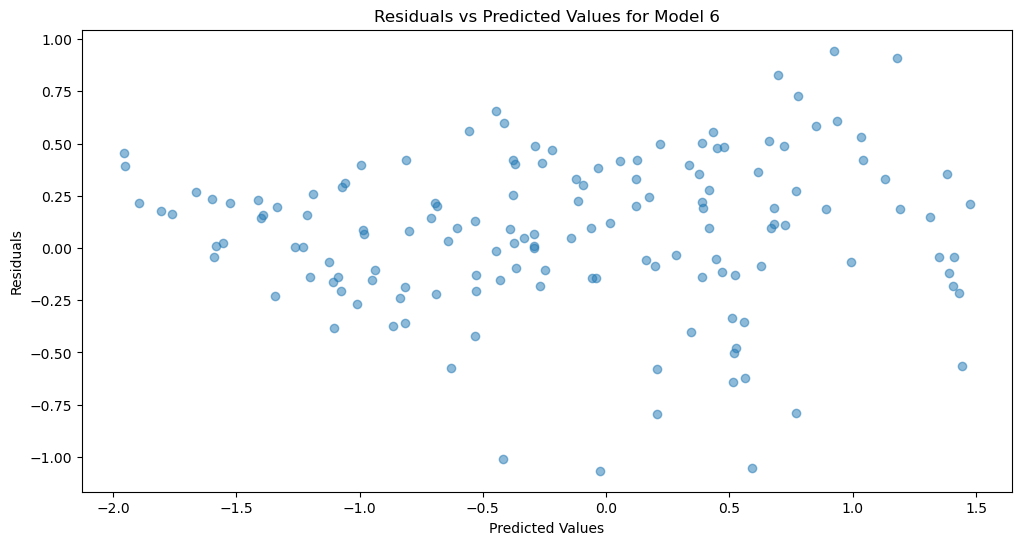

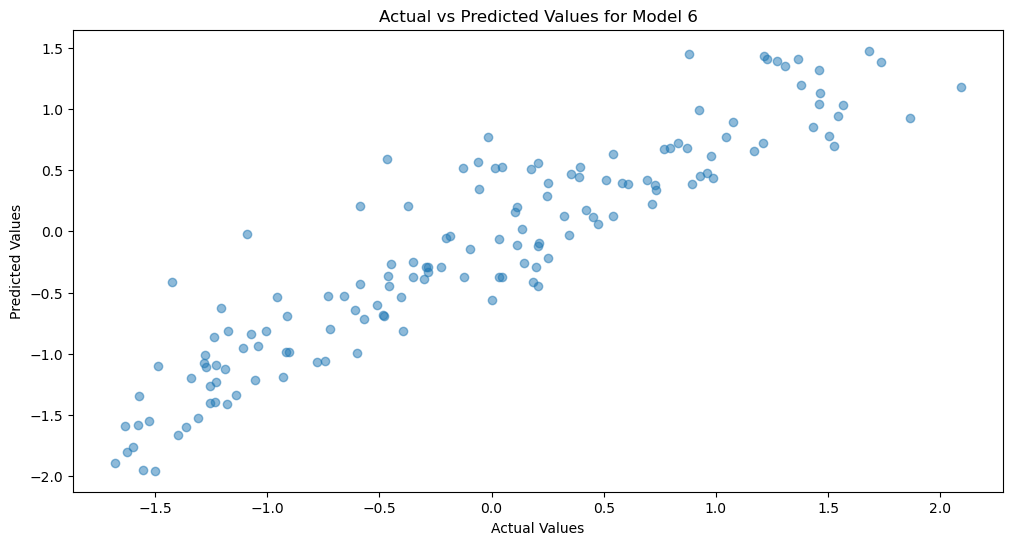

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


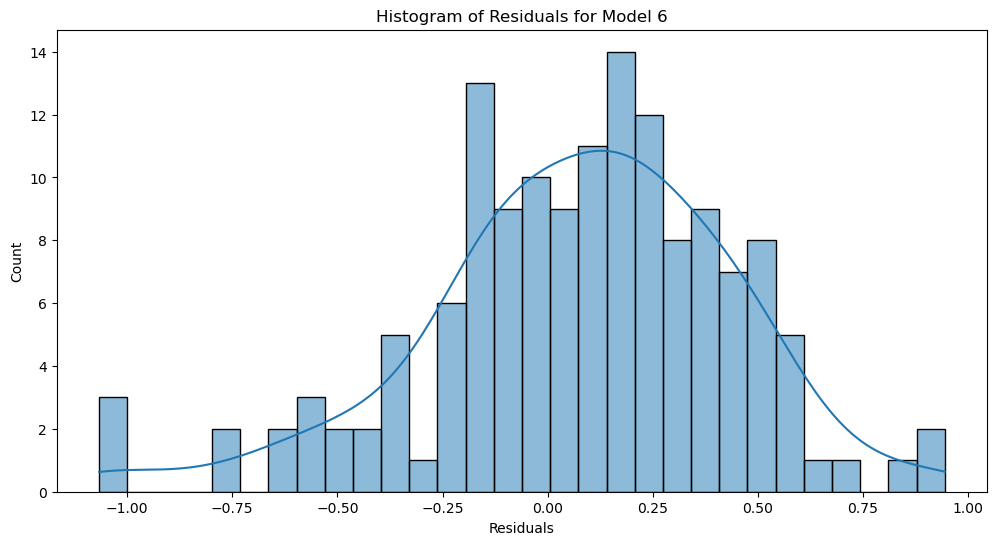

In [47]:
plot_model_diagnostics(y_test, y_pred_6, "Model 6")

# Evaluating all 6 models

In [49]:
add_model_results(6, model_6, vif_6)
# Display the results
print(model_results)

     Model  R-squared  Adjusted R-squared  Durbin-Watson   Max VIF  \
0  Model 1   0.847970            0.839139       2.066907  1.000000   
1  Model 2   0.847970            0.839139       2.066907  1.000000   
2  Model 3   0.965169            0.964615       2.067060  0.939791   
3  Model 4   0.953428            0.952968       2.018719  0.905630   
4  Model 5   0.845277            0.840266       2.034958  0.987679   
5  Model 6   0.784655            0.781659       2.033733  0.955924   

           AIC          BIC  
0  8280.762704  8403.617422  
1  8280.762704  8403.617422  
2  8444.417740  8478.308696  
3  8586.860785  8608.042633  
4  8265.736414  8337.754697  
5   789.812903   829.142012  


# Evaluation Metrics

1. **Lower AIC and BIC**:
   - **Model 6** has significantly lower AIC (789.81) and BIC (829.14) values compared to **Model 5** (AIC: 8265.74, BIC: 8337.75). Lower AIC and BIC values indicate a better model in terms of fit while penalizing for the number of parameters. This suggests that Model 6 strikes a better balance between model complexity and goodness of fit.

2. **Adjusted R-squared**:
   - While **Model 6** has a lower Adjusted R-squared (0.7817) compared to **Model 5** (0.8403), the difference is not as critical as the difference in AIC and BIC values. The Adjusted R-squared indicates how well the model explains the variance in the dependent variable, adjusted for the number of predictors. Even though Model 6 explains slightly less variance, the significantly lower AIC and BIC values make it a more parsimonious model.

3. **Durbin-Watson Statistic**:
   - Both models have similar Durbin-Watson statistics, indicating that they both handle autocorrelation in residuals similarly well. A value close to 2 suggests there is no autocorrelation problem.

4. **Max VIF**:
   - Both models have very low Max VIF values (Model 5: 0.9935, Model 6: 0.9559), indicating that multicollinearity is not an issue for either model.

# Conclusion

- **Model 6** is preferred over **Model 5** primarily due to its much lower AIC and BIC values. This suggests that Model 6 provides a more efficient and potentially more accurate model by balancing fit and complexity better than Model 5.
- The lower Adjusted R-squared value for Model 6 is outweighed by the significant improvements in AIC and BIC.
- Overall, Model 6 is more parsimonious and, according to the model selection criteria (AIC and BIC), is the better model despite the slightly lower Adjusted R-squared.

## Best Fit Equation for `cnt`

In [52]:
# Extract coefficients from Model 6
coefficients = model_6.params

# Print the coefficients for reference
print(coefficients)

# Formulate the regression equation
equation = f"cnt = {coefficients['const']:.4f}"
for variable in coefficients.index[1:]:
    sign = '+' if coefficients[variable] >= 0 else '-'
    equation += f" {sign} {abs(coefficients[variable]):.4f} * {variable}"

print("Best Fit Equation for cnt:")
print(equation)

const        -0.706429
season        0.211999
yr            1.033006
holiday      -0.345248
weekday       0.035111
weathersit   -0.322366
temp          0.500588
hum          -0.068873
windspeed    -0.109164
dtype: float64
Best Fit Equation for cnt:
cnt = -0.7064 + 0.2120 * season + 1.0330 * yr - 0.3452 * holiday + 0.0351 * weekday - 0.3224 * weathersit + 0.5006 * temp - 0.0689 * hum - 0.1092 * windspeed


This regression equation helps us understand how different factors affect the number of bike rentals. Each coefficient represents the expected change in the number of rentals for a one-unit change in the predictor variable, holding all other variables constant.

- Positive coefficients (like for `yr` and `temp`) indicate factors that increase bike rentals.
- Negative coefficients (like for `holiday` and `weathersit`) indicate factors that decrease bike rentals.

By plugging in specific values for the predictor variables, one can predict the expected number of bike rentals (`cnt`) for given conditions.

In [54]:
# Extract coefficients from the model
coefficients = model_6.params.drop('const')

# Create a DataFrame to store both correlation and coefficient annotations
coeffmat6 = pd.DataFrame('', index=corr_matrix.index, columns=corr_matrix.columns)

for col in coeffmat6.columns:
    for row in coeffmat6.index:
        if col == row:
            if row in coefficients.index:
                coeffmat6.loc[row, col] = f'{corr_matrix.loc[row, col]:.2f}\nCoef={coefficients[row]:.2f}'
            else:
                coeffmat6.loc[row, col] = f'{corr_matrix.loc[row, col]:.2f}'
        else:
            coeffmat6.loc[row, col] = f'{corr_matrix.loc[row, col]:.2f}'
coeffmat6

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
season,nan,1.00\nCoef=0.21,0.01,0.85,0.01,0.01,0.04,0.02,0.33,0.34,0.19,0.19
yr,nan,0.01,1.00\nCoef=1.03,0.02,0.01,0.00,0.01,0.03,0.05,0.05,0.10,0.03
mnth,nan,0.85,0.02,1.00,0.03,0.01,0.01,0.05,0.23,0.24,0.23,0.19
holiday,nan,0.01,0.01,0.03,1.00\nCoef=-0.35,0.10,0.26,0.03,0.06,0.07,0.03,0.00
weekday,nan,0.01,0.00,0.01,0.10,1.00\nCoef=0.04,0.05,0.01,0.01,0.00,0.05,0.02
workingday,nan,0.04,0.01,0.01,0.26,0.05,1.00,0.05,0.10,0.10,0.05,0.05
weathersit,nan,0.02,0.03,0.05,0.03,0.01,0.05,1.00\nCoef=-0.32,0.11,0.11,0.59,0.09
temp,nan,0.33,0.05,0.23,0.06,0.01,0.10,0.11,1.00\nCoef=0.50,1.00,0.11,0.16
atemp,nan,0.34,0.05,0.24,0.07,0.00,0.10,0.11,1.00,1.00,0.12,0.19


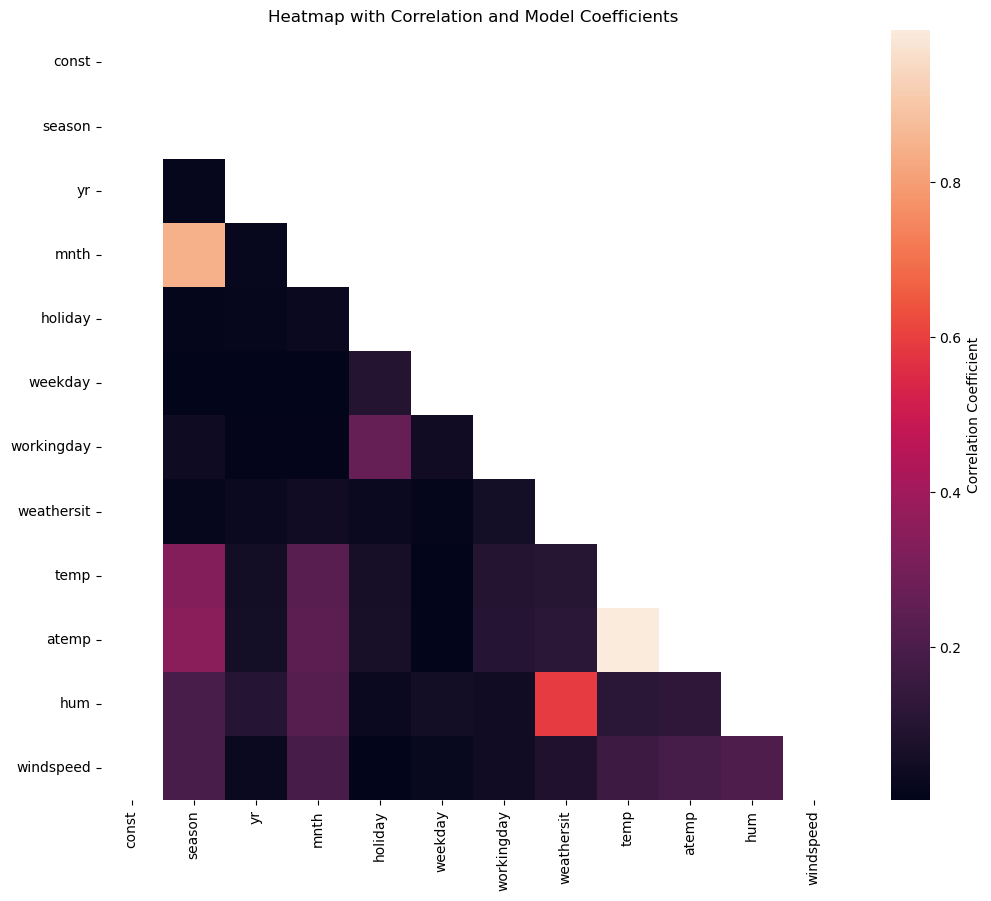

In [55]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=coeffmat6, fmt='', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Heatmap with Correlation and Model Coefficients')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


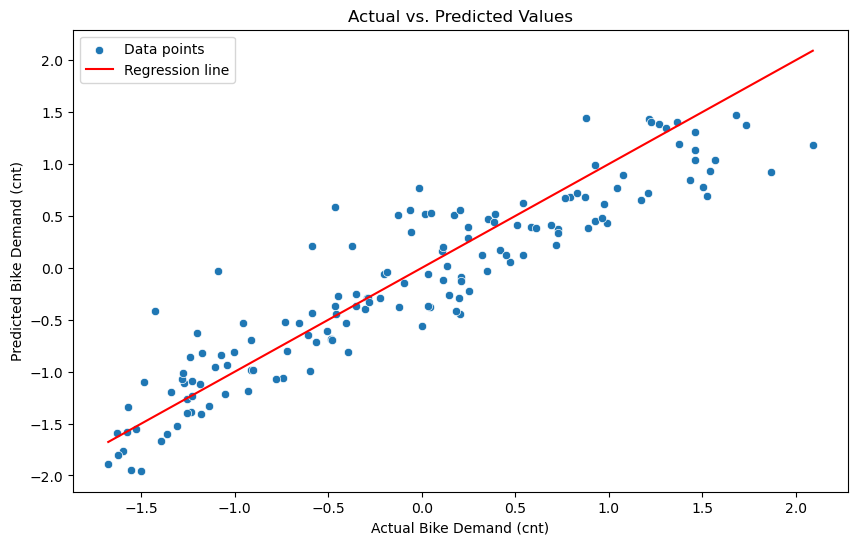

In [56]:
# Plot actual vs. predicted values
df_actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_6})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=df_actual_vs_predicted, label='Data points')
sns.lineplot(x='Actual', y='Actual', data=df_actual_vs_predicted, color='red', label='Regression line')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Bike Demand (cnt)')
plt.ylabel('Predicted Bike Demand (cnt)')
plt.legend()
plt.show()

In [57]:
# Choosing y_pred_6 from optimal model 6 as final for use as per instruction in the assignment
y_pred = y_pred_6

In [58]:
#Running Model 6 against Y_test data for getting r squared from test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8487929258335126

### Interpretation of R² Value
The `r2_score` function from `sklearn.metrics` calculates the R-squared (R²) value, which is a statistical measure that indicates how well the regression predictions approximate the real data points. It is also known as the coefficient of determination.

- **R² Value**: The value of 0.8487929258335126 means that approximately 84.88% of the variance in the dependent variable (`y_test`) can be explained by the independent variables in the model. This is a relatively high R² value, indicating that the model fits the data well.

### Usage

The R² value ranges from 0 to 1:
- **R² = 1**: Indicates that the regression predictions perfectly fit the data.
- **R² = 0**: Indicates that the model does not explain any of the variance in the dependent variable.
- **R² < 0**: Can occur in cases where the model performs worse than a horizontal line representing the mean of the dependent variable.